In [1]:
def isAvailable(str):
    if str==None or str!=str or len(str)==0:
        return 0
    else:
        return 1    
def outputClass(str,x):
    return x[str]

def splitColId(num,p):
    def splitCol(str):
        if str==None or str!=str or len(str)==0:
            return ""
        else:
            s= str.split(p)
            if num < len(s):
                return s[num]
            else:
                return ""
    return splitCol

def convertDateToUnits(str):
    return datetime.strptime(str, '%Y-%m-%d %H:%M:%S')
    
def convertDate(str):
    if str==None or str!=str or len(str)==0:
        return 365
    tstr = str.split(" ");
    vals={"year":365,"years":365,"months":30,"days":1,"month":30,"day":1,"weeks":7,"week":7}
    result=0
    i=0;
    while (i < len(tstr)):
        result=result+(int(tstr[i])*vals[tstr[i+1]])
        i=i+2;
    return result            

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
rs=pd.read_csv("train.csv")
rs.describe()
rs["hasName"]=rs["Name"].apply(isAvailable)
rs["convertedAge"]=rs["AgeuponOutcome"].apply(convertDate)
rs["subsex"]=rs["SexuponOutcome"].apply(splitColId(1," "))
rs["sex"]=rs["SexuponOutcome"].apply(splitColId(0," "))
rs["month"]=rs["DateTime"].apply(lambda x : convertDateToUnits(x).month )
rs["day"]=rs["DateTime"].apply(lambda x : convertDateToUnits(x).day )
rs["hour"]=rs["DateTime"].apply(lambda x : convertDateToUnits(x).hour )
rs.head()

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,hasName,convertedAge,subsex,sex,month,day,hour
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,365,Male,Neutered,2,12,18
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,365,Female,Spayed,10,13,12
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,730,Male,Neutered,1,31,12
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,21,Male,Intact,7,11,19
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,730,Male,Neutered,11,15,12


In [3]:
di1=dict(zip(rs["OutcomeType"].unique(),range(len(rs["OutcomeType"].unique()))))
di2=dict(zip(rs["AnimalType"].unique(),range(len(rs["AnimalType"].unique()))))
di3=dict(zip(rs["sex"].unique(),range(len(rs["sex"].unique()))))
di4=dict(zip(rs["subsex"].unique(),range(len(rs["subsex"].unique()))))
print(di1)
print(di2)
print(di3)
print(di4)
rs.drop('AnimalID', axis=1, inplace=True)
rs.drop('Name', axis=1, inplace=True)
rs.drop('OutcomeSubtype', axis=1, inplace=True)
rs.drop('SexuponOutcome', axis=1, inplace=True)
rs.drop('AgeuponOutcome', axis=1, inplace=True)
rs.drop('Breed', axis=1, inplace=True)
rs.drop('Color', axis=1, inplace=True)
rs.drop('DateTime', axis=1, inplace=True)

rs=rs.replace({"OutcomeType":di1,"AnimalType":di2,"sex":di3,"subsex":di4})
rs.head()

{'Transfer': 3, 'Adoption': 2, 'Euthanasia': 1, 'Return_to_owner': 0, 'Died': 4}
{'Dog': 0, 'Cat': 1}
{'Neutered': 0, '': 4, 'Unknown': 3, 'Intact': 2, 'Spayed': 1}
{'Male': 0, '': 2, 'Female': 1}


,OutcomeType,AnimalType,hasName,convertedAge,subsex,sex,month,day,hour
0,0,0,1,365,0,0,2,12,18
1,1,1,1,365,1,1,10,13,12
2,2,0,1,730,0,0,1,31,12
3,3,1,0,21,0,2,7,11,19
4,3,0,0,730,0,0,11,15,12


In [4]:
rs.head()

,OutcomeType,AnimalType,hasName,convertedAge,subsex,sex,month,day,hour
0,0,0,1,365,0,0,2,12,18
1,1,1,1,365,1,1,10,13,12
2,2,0,1,730,0,0,1,31,12
3,3,1,0,21,0,2,7,11,19
4,3,0,0,730,0,0,11,15,12


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2f047e748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb2ae4b7860>]], dtype=object)

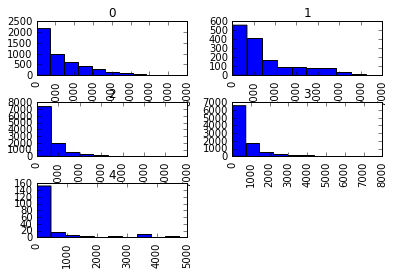

In [5]:

rs.convertedAge.hist(by=rs.OutcomeType)

In [7]:
print(list(rs.columns.values))
X=rs[list(['AnimalType', 'hasName', 'convertedAge', 'subsex', 'sex', 'month', 'day', 'hour'])].values
y=rs['OutcomeType'].values
from sklearn.tree import DecisionTreeClassifier,export_graphviz
clf1 = DecisionTreeClassifier(max_depth=4)
clf1.fit(X,y)
export_graphviz(clf1,feature_names=['AnimalType', 'hasName', 'convertedAge', 'subsex', 'sex', 'month', 'day', 'hour'])

['OutcomeType', 'AnimalType', 'hasName', 'convertedAge', 'subsex', 'sex', 'month', 'day', 'hour']
